# Décomposition dans la base de Haar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio, Markdown, display

import matplotlib as mpl
mpl.rcParams['axes.grid'] = True

In [2]:
def haar(N):
    """Ondelettes de Haar 1D.
    
    N : nombre de fonctions de la base de Haar.
    
    vincent.mazet@unistra.fr, 20/07/2020
    """

    import numpy as np
    
    # Format de base
    f = [1, -1]
    
    # Premier signal (constant)
    h = np.ones(N)
    h = h / np.linalg.norm(h)
    hh = [h]      
    
    K = np.log2(N)
    for k in np.arange(K, 0, -1):

        # Longueur de la partie non nulle de l'ondelette
        T = 2**k
        
        # Nombre de morceaux non nuls dans l'ondelette, pour la taille considérée
        L = int(N/T)
        
        # Crée l'ondelette
        for i in range(L):
            
            M = int(T/2)
            x = np.kron( f, [1.]*M)
            idx = np.zeros(L)
            idx[i] = 1
            h = np.kron(idx, x)            
            h = h / np.linalg.norm(h)
            hh.append(h)
            
    return hh

In [3]:
# Taille des signaux
M = 4
N = M*M
n = np.arange(N)

## Signaux de la base de Haar

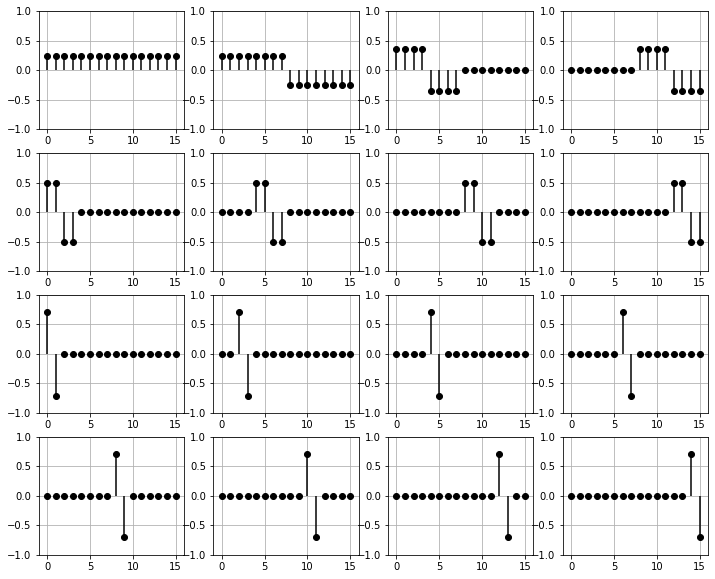

In [4]:
hh = haar(N)
fig, axs = plt.subplots(M, M, figsize=(12, 10))
axs = axs.ravel()
for i, h in enumerate(hh):
    axs[i].stem(n, h, basefmt=' ', linefmt='k', markerfmt='ko')
    axs[i].axis([-1, N, -1, 1])
plt.show()

## Signal aléatoire

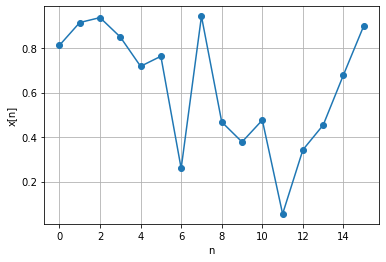

In [5]:
# Signal x
x = np.random.random(N)

# Affichage
plt.figure()
plt.plot(n, x, "o-")
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

## Décomposition dans la base de Haar

Coefficients dans la base de Haar :
[ 2.48738447  0.61094772  0.29363637 -0.35361617 -0.02991153  0.13953834
  0.15748741 -0.3915646  -0.07251211  0.0616179  -0.03196504 -0.48373057
  0.06349474  0.29823628 -0.07881713 -0.15600451]



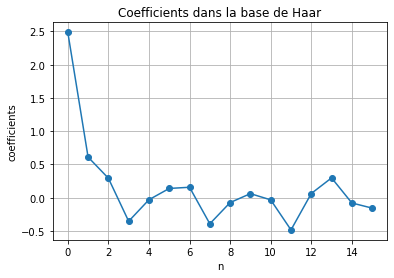

In [6]:
# Compression dans la base de Haar
b = haar(N)
c = np.zeros(N)
for i in range(N):
    c[i] = np.dot(x, b[i])

print("Coefficients dans la base de Haar :")
print(c)
print()

# Affichage
plt.figure()
plt.plot(n, c, "o-")
plt.xlabel('n')
plt.ylabel('coefficients')
plt.title('Coefficients dans la base de Haar')
plt.show()

##  ... et reconstruction dans la base canonique

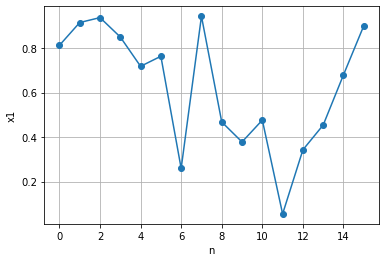

In [7]:
# Reconstruction dans la base canonique
x2 = np.zeros(N)
for i in range (N):
    x2 += c[i] * b[i]

# Affichage
plt.figure()
plt.plot(n, x2, "o-")
plt.xlabel('n')
plt.ylabel('x1')
plt.show()

## Comparaison des deux méthodes de compression 

In [8]:
# Compression dans la base canonique
x1 = x.copy()
x1[int(N/2):] = 0

# Compression dans la base de Haar & reconstruction
c2 = c.copy()
c2[int(N/2):] = 0
x2 = np.zeros(N)
for i in range (N):
    x2 += c2[i] * b[i]

# EQM
eqm1 = np.linalg.norm(x-x1)
eqm2 = np.linalg.norm(x-x2)

La première méthode de compression consiste simplement à annuler les N/2 derniers échantillons de $x$ :

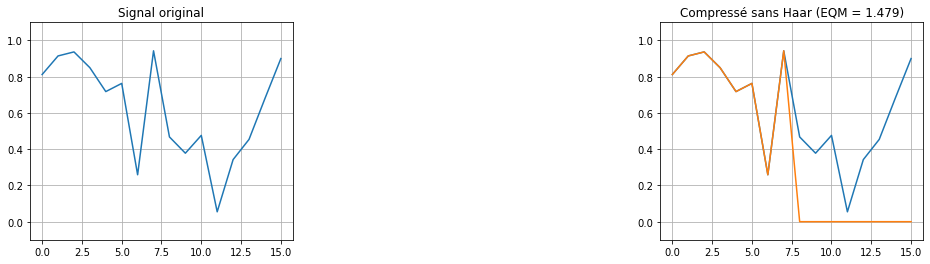

In [9]:
plt.figure(figsize=(16,4))

# Signal initial
plt.subplot(1,3,1)
plt.plot(n, x, "tab:blue")
plt.ylim([-.1, 1.1])
plt.title("Signal original")

# Signal compressé
plt.subplot(1,3,3)
plt.plot(n, x, "tab:blue")
plt.plot(n, x1, "tab:orange")
plt.ylim([-.1, 1.1])
plt.title(f"Compressé sans Haar (EQM = {eqm1:.3f})")

plt.show()

La seconde méthode de compression décompose d'abord le signal dans la base de Haar, puis annule les N/2 derniers coefficients obtenus, et enfin reconstruit le signal dans la base canonique :

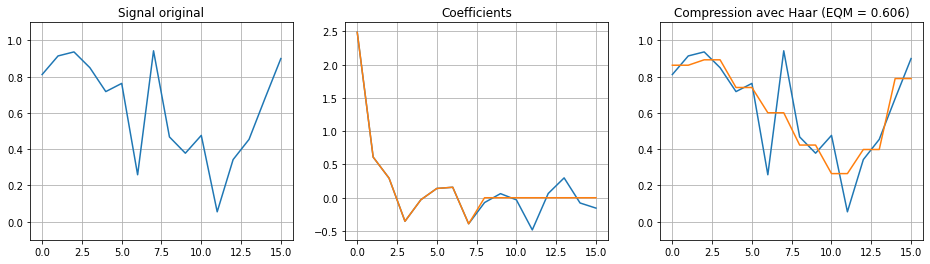

In [10]:
plt.figure(figsize=(16,4))

# Signal initial
plt.subplot(1,3,1)
plt.plot(n, x, "tab:blue")
plt.ylim([-.1, 1.1])
plt.title("Signal original")

# Coefficients dans la base de Haar
plt.subplot(1,3,2)
plt.plot(n, c, "tab:blue")
plt.plot(n, c2, "tab:orange")
plt.title("Coefficients")

# Signal compressé
plt.subplot(1,3,3)
plt.plot(n, x, "tab:blue")
plt.plot(n, x2, "tab:orange")
plt.ylim([-.1, 1.1])
plt.title(f"Compression avec Haar (EQM = {eqm2:.3f})")

plt.show()

## Application à un véritable signal audio

In [11]:
# Chargement de la musique
fe, mus = wavfile.read("../_static/Elise.wav")

# Ne conserve que le début
M = 2**18
mus = mus[0:M]              # Musique originale
mu1 = np.zeros(mus.shape)   # Musique compressée dans la base canonique
mu2 = np.zeros(mus.shape)   # Musique compressée dans la base de Haar

# Paramètres
N = 16         # Nombre de points par morceau
L = 8          # Nombre de points conservés
K = int(M/N)   # Nombre de morceaux

# Vecteurs de la base et des coefficients
b = haar(N)
c = np.zeros(N)

for k in range(K):

    # Morceau du signal de N échantillons
    idx = range( (k*N-N), k*N)
    x = mus[idx]

    # Compression dans la base canonique
    x1 = x.copy()
    x1[L:] = 0
    mu1[idx] = x1

    # Compression dans la base de Haar
    for i in range(N):
        c[i] = np.dot(x, b[i])
    c[L:] = 0
    x2 = np.zeros(N)
    for i in range(N):
        x2 += c[i] * b[i]
    mu2[idx] = x2

Musique originale :

In [12]:
display(Audio(mus, rate=fe))

Compression dans la base canonique :

In [13]:
display(Audio(mu1, rate=fe))

Compression dans la base de Haar :

In [14]:
display(Audio(mu2, rate=fe))

In [15]:
# Test : compression de 25%, on garde 1 échantillon sur 4 en temporel et 25% des basses fréquences en Haar

# Chargement de la musique
fe, mus = wavfile.read("../_static/Elise.wav")

# Ne conserve que le début
M = 2**17
mus = mus[0:M]              # Musique originale
mu1 = np.zeros(mus.shape)   # Musique compressée dans la base canonique
mu2 = np.zeros(mus.shape)   # Musique compressée dans la base de Haar

# Paramètres
N = 16         # Nombre de points par morceau
L = 8          # Nombre de points conservés
K = int(M/N)   # Nombre de morceaux

# Vecteurs de la base et des coefficients
b = haar(N)
c = np.zeros(N)

for k in range(K):

    # Morceau du signal de N échantillons
    idx = range( (k*N-N), k*N)
    x = mus[idx]

    # Compression dans la base canonique
    x1 = x.copy()
    
    test = 1
    
    if test==0:
        x1[L:] = 0
    
    if test==1:
        x1[1::4] = 0
        x1[2::4] = 0
        x1[3::4] = 0
        
    if test==2:
        i = np.argsort(x1)
        x1[i[:L]] = 0
    
    
    mu1[idx] = x1

    # Compression dans la base de Haar
    for i in range(N):
        c[i] = np.dot(x, b[i])  
    c[4:] = 0
    x2 = np.zeros(N)
    for i in range(N):
        x2 += c[i] * b[i]
    mu2[idx] = x2
    
display(Audio(mus, rate=fe))
display(Audio(mu1, rate=fe))
display(Audio(mu2, rate=fe))